<a href="https://colab.research.google.com/github/waves025/machine_learning/blob/master/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# TensorFlow and tf.keras
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [39]:
print("The dimension of the train dataset is {}".format(train_images.shape))

The dimension of the train dataset is (60000, 28, 28)


In [40]:
print("Number of training records {}".format(len(train_images)))

Number of training records 60000


In [41]:
print("List of our label classes {}".format(list(np.unique(train_labels))))

List of our label classes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [42]:
print("The dimension of the train dataset is {}".format(test_images.shape))

The dimension of the train dataset is (10000, 28, 28)


In [43]:
print("Number of training records {}".format(len(test_labels)))

Number of training records 10000


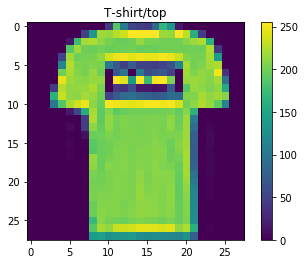

In [44]:
plt.figure()
plt.imshow(train_images[1])
plt.title(class_names[train_labels[1]])
plt.colorbar()
plt.grid(False)
plt.show()

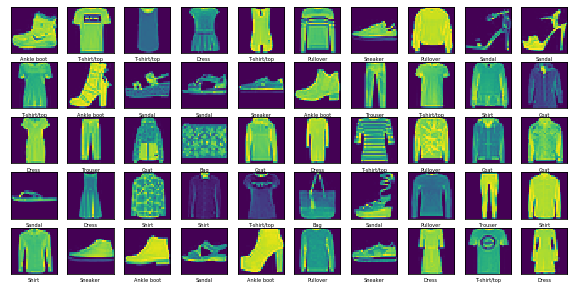

In [45]:
plt.figure(figsize=(10, 10))

for i in range(50):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]], fontsize=5)
plt.show()

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Begin the training now...
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 119us/sample - loss: 1.6715 - acc: 0.7981 - val_loss: 1.6262 - val_acc: 0.8377
Epoch 2/10
48000/48000 [==============================] - 5s 106us/sample - loss: 1.6214 - acc: 0.8416 - val_loss: 1.6210 - val_acc: 0.8425
Epoch 3/10
48000/48000 [==============================] - 5s 104us/sample - loss: 1.6106 - acc: 0.8522 - val_loss: 1.6339 - val_acc: 0.8290
Epoch 4/10
48000/48000 [==============================] - 5s 103us/sample - loss: 1.6051 - acc: 0.8570 - val_loss: 1.6054 - val_acc: 0.8574
Epoch 5/10
48000/48000 [==============================] - 5s 105us/sample - loss: 1.5977 - acc: 0.8649 - val_loss: 1.6152 - val_acc: 0.8462
Epoch 6/10
48000/48000 [==============================] - 5s 106us/sample - loss: 1.5939 - acc: 0.8674 - val_loss: 1.5961 - val_acc: 0.8640
Epoch 7/10
48000/48000 [==============================] - 5s 105us/sample - loss: 1.5900 - acc: 0.8720 - val_l

In [50]:
# Check the performs of the model on the unknown records...
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.8528


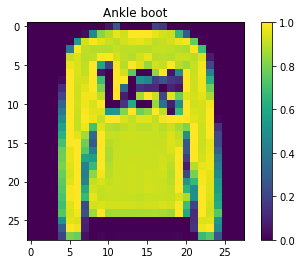

In [52]:
# How to perform prediction on single image & used inside package for inferences...
predictions = model.predict(test_images[0:1])
plt.figure()
plt.imshow(test_images[1])
plt.title(class_names[np.argmax(predictions)])
plt.colorbar()
plt.grid(False)
plt.show()